# Community Detection Using topology

# Loading Data

In [1]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:

# Load citation data from graph.txt
citation_data = np.loadtxt('graph.txt', dtype=int)

# Load group data from group.txt
group_data = np.loadtxt('group.txt', dtype=int)

# Load feature data from feature.txt
feature_data = np.loadtxt('feature.txt', dtype=int)

# Print a few examples to verify the loaded data
print("Citation Data:")
print(citation_data[:5])  # Print the first 5 rows

print("\nGroup Data:")
print(group_data[:5])  # Print the first 5 rows

print("\nFeature Data:")
print(feature_data[:5, :10])  # Print the first 5 rows and first 10 columns

# Load data into pandas DataFrames (optional, for easier data manipulation)
citation_df = pd.DataFrame(citation_data, columns=['source', 'target'])
group_df = pd.DataFrame(group_data, columns=['paper_id', 'group_id'])
feature_df = pd.DataFrame(feature_data)

# Display the first few rows of the DataFrames
print("\nCitation DataFrame:")
print(citation_df.head())

print("\nGroup DataFrame:")
print(group_df.head())

print("\nFeature DataFrame:")
print(feature_df.head())


Citation Data:
[[  0   0]
 [  0  99]
 [  0 111]
 [  0 381]
 [  0 415]]

Group Data:
[[0 0]
 [1 1]
 [2 0]
 [3 2]
 [4 3]]

Feature Data:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Citation DataFrame:
   source  target
0       0       0
1       0      99
2       0     111
3       0     381
4       0     415

Group DataFrame:
   paper_id  group_id
0         0         0
1         1         1
2         2         0
3         3         2
4         4         3

Feature DataFrame:
   0     1     2     3     4     5     6     7     8     9     ...  3693   
0     0     0     0     0     0     0     0     0     0     0  ...     0  \
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     1     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   
4     0     0     0     0     0     0     0     0     0     0  ...    

# Adjacency Matrix

In [3]:
import numpy as np

# Load citation data from graph.txt
citation_data = np.loadtxt('graph.txt', dtype=int)

# Determine the number of nodes (papers)
num_nodes = np.max(citation_data) + 1

# Initialize an empty adjacency matrix
adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)

# Populate the adjacency matrix based on citation relationships
for source, target in citation_data:
    adjacency_matrix[source, target] = 1
    adjacency_matrix[target, source] = 1  # Ensure symmetric relationship

# Display the adjacency matrix (optional)
print("Adjacency Matrix:")
print(adjacency_matrix)

# Save the adjacency matrix to a file (optional)
np.savetxt('adjacency_matrix.csv', adjacency_matrix, delimiter=',', fmt='%d')


Adjacency Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# Load group.txt (paper IDs and group IDs)
group_file_path = 'group.txt'
group_data = np.loadtxt(group_file_path, dtype=int)

# Create a dictionary to store the mapping of paper IDs to group IDs
paper_to_group = {}

# Fill in the dictionary based on the loaded group data
for paper_id, group_id in group_data:
    paper_to_group[paper_id] = group_id

# Print a few entries from the paper_to_group dictionary for verification
print("Paper to Group Dictionary Sample:")
print({k: v for k, v in list(paper_to_group.items())[:5]})


Paper to Group Dictionary Sample:
{0: 0, 1: 1, 2: 0, 3: 2, 4: 3}


In [5]:
import numpy as np
import networkx as nx

# Load citation data from graph.txt
citation_data = np.loadtxt('graph.txt', dtype=int)

# Create a directed graph from the citation data
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(citation_data)

# Compute and print basic network statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
avg_clustering = nx.average_clustering(G)

print("Basic Network Statistics:")
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density:.4f}")
print(f"Average degree: {avg_degree:.4f}")
print(f"Average clustering coefficient: {avg_clustering:.4f}")


Basic Network Statistics:
Number of nodes: 3312
Number of edges: 4731
Density: 0.0004
Average degree: 2.8569
Average clustering coefficient: 0.0739


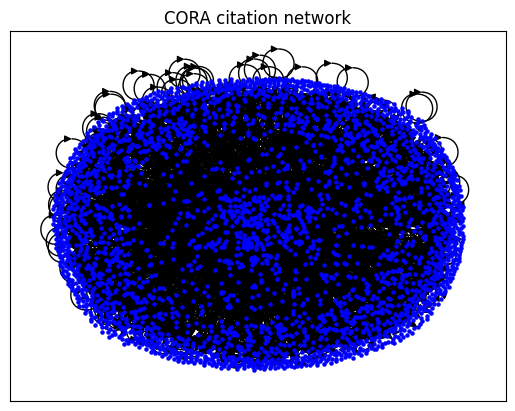

In [6]:
# Create a layout for the nodes 
layout = nx.spring_layout(G)

# Draw the nodes using the layout
nx.draw_networkx_nodes(G, layout, node_color='blue', node_size=5)

# Draw the edges
nx.draw_networkx_edges(G, layout, edge_color='black')


plt.title("CORA citation network")
plt.show()


# Louvain algorithm

In [11]:
# Load citation data from graph.txt
citation_data = np.loadtxt('graph.txt', dtype=int)

# Create a directed graph from the citation data
G_directed = nx.DiGraph()

# Add edges to the graph
G_directed.add_edges_from(citation_data)

# Now you can use the Louvain method
import community as community_louvain

# compute the best partition
partition = community_louvain.best_partition(G)

In [19]:
import collections

# Count the number of members in each community
community_sizes = collections.Counter(partition.values())
count=0

# Print the communities and their sizes
for community, size in community_sizes.items():
    print(f"Community {community}: {size} members")
    count+=1


Community 66: 102 members
Community 1: 97 members
Community 55: 81 members
Community 4: 29 members
Community 5: 214 members
Community 6: 100 members
Community 7: 216 members
Community 8: 92 members
Community 9: 103 members
Community 21: 114 members
Community 11: 2 members
Community 12: 8 members
Community 13: 2 members
Community 14: 13 members
Community 15: 12 members
Community 16: 138 members
Community 17: 45 members
Community 18: 3 members
Community 19: 4 members
Community 22: 2 members
Community 23: 68 members
Community 24: 2 members
Community 26: 2 members
Community 27: 5 members
Community 28: 2 members
Community 29: 3 members
Community 30: 3 members
Community 31: 2 members
Community 32: 52 members
Community 33: 93 members
Community 34: 2 members
Community 35: 37 members
Community 36: 2 members
Community 37: 62 members
Community 38: 9 members
Community 39: 3 members
Community 40: 2 members
Community 42: 2 members
Community 43: 2 members
Community 44: 2 members
Community 45: 37 memb

In [40]:
print("The total no of communities : ",count)

The total no of communities :  461


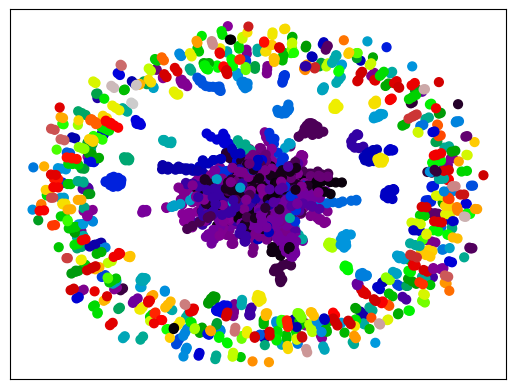

In [16]:
import matplotlib.cm as cm

# Create a color map with 461 colors
cmap = cm.get_cmap('nipy_spectral', 461)

# visualize
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
plt.show()

In [9]:
modularity = community_louvain.modularity(partition, G)
print(f"Modularity: {modularity}")

Modularity: 0.8896324172838945


In [3]:
# Calculate conductance for each community
conductances = []
for community_id in set(partition.values()):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    external_edges = sum([1 for node in community_nodes for neighbor in G.neighbors(node) if partition[neighbor] != community_id])
    internal_edges = sum([1 for node in community_nodes for neighbor in G.neighbors(node) if partition[neighbor] == community_id])
    
    if internal_edges + external_edges > 0:
        conductance = external_edges / (internal_edges + external_edges)
        conductances.append(conductance)

# Print average conductance
average_conductance = sum(conductances) / len(conductances)
print(f"The Average Conductance is {average_conductance}")

 The Average Conductance is 0.33


# Girvan Newman algorithm

In [17]:
import networkx as nx
from networkx.algorithms import community

# Use the Girvan-Newman algorithm to find communities
communities_generator = community.girvan_newman(G)

# Get the first partition of the graph
top_level_communities = next(communities_generator)
partitions = {node: i for i, community in enumerate(top_level_communities) for node in community}

In [18]:
print("The communities : ")
index = 0

for i in top_level_communities:
    print("Community {} : {}".format(index,i))
    index+=1

The communities : 
Community 0 : {0, 2049, 2050, 2048, 2051, 5, 6, 2052, 8, 2057, 9, 11, 2054, 13, 14, 2055, 16, 17, 18, 19, 20, 23, 2072, 2071, 2074, 2075, 27, 2077, 2078, 29, 2080, 33, 2076, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 2094, 2095, 49, 2098, 2099, 52, 53, 55, 2103, 57, 59, 61, 2109, 63, 64, 2112, 2114, 2110, 2111, 70, 2119, 72, 71, 2121, 2123, 75, 2125, 76, 77, 80, 81, 2122, 83, 84, 2134, 2136, 89, 91, 92, 2140, 97, 2145, 99, 101, 104, 2056, 108, 109, 110, 111, 112, 2159, 114, 115, 116, 119, 2167, 121, 124, 125, 126, 2175, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 2196, 149, 150, 148, 157, 158, 2207, 160, 161, 163, 164, 165, 166, 170, 171, 173, 174, 177, 181, 183, 185, 186, 187, 188, 2237, 190, 191, 192, 193, 2233, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 2253, 207, 208, 209, 210, 211, 2260, 2259, 214, 215, 216, 217, 226, 227, 859, 229, 230, 2282, 2283, 237, 239, 240, 241, 242, 243, 2292, 245, 246, 247, 249, 250, 2299

In [38]:
print("The total number of communities : {}".format(len(top_level_communities)))

The total number of communities : 434


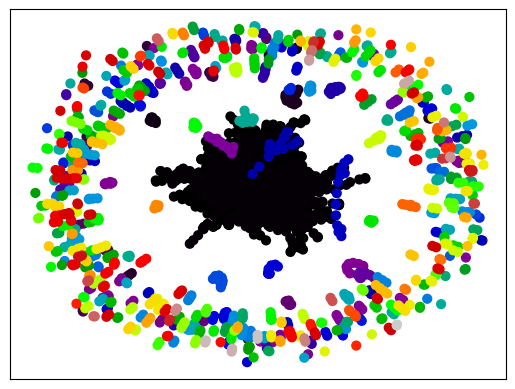

In [38]:

# Visualize the communities
pos = nx.spring_layout(G)
cmap = cm.get_cmap('nipy_spectral', 434)
nx.draw_networkx_nodes(G, pos, partitions.keys(), node_size=40, cmap=cmap, node_color=list(partitions.values()))
plt.show()


In [10]:
# Calculate and print modularity
modularity = community.modularity(partitions, G)
print("The Modularity for girvan newman: {:.4f}".format(modularity))

The modularity for girvan newman is 0.7523


In [2]:
# Calculate conductance for each community
conductances = []
for community_id in set(partition.values()):
    community_nodes = [node for node, comm_id in partition.items() if comm_id == community_id]
    external_edges = sum([1 for node in community_nodes for neighbor in G.neighbors(node) if partition[neighbor] != community_id])
    internal_edges = sum([1 for node in community_nodes for neighbor in G.neighbors(node) if partition[neighbor] == community_id])
    
    if internal_edges + external_edges > 0:
        conductance = external_edges / (internal_edges + external_edges)
        conductances.append(conductance)

# Print average conductance
average_conductance = sum(conductances) / len(conductances)
print(f"The Average Conductance: {average_conductance}")


The Average conductance is : 0.39
